In [2]:
#!pip install tensorflow==2.16.2

In [3]:
# !pip install tensorflow-macos tensorflow-metal

In [4]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU


print(tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

2.19.0
Available GPUs: []


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Check GPU availability
print(tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build tf.data pipeline
batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)



2.19.0
Available GPUs: []


2025-05-09 08:47:56.141005: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [7]:
# Define model
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])

# Compile and train model
import time
start_time = time.time()
#with tf.device('/CPU:0'):
with tf.device('/GPU:0'):

    model = create_model()
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(train_ds, epochs=5, validation_data=test_ds)

print(time.time()-start_time)



Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8785 - loss: 0.3964 - val_accuracy: 0.9825 - val_loss: 0.0563
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9793 - loss: 0.0681 - val_accuracy: 0.9831 - val_loss: 0.0543
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9844 - loss: 0.0572 - val_accuracy: 0.9815 - val_loss: 0.0745
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9841 - loss: 0.0630 - val_accuracy: 0.9834 - val_loss: 0.0756
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9827 - loss: 0.0959 - val_accuracy: 0.9763 - val_loss: 0.1912
51.49794411659241


Epoch 1/5


2025-05-09 15:05:27.665105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8911 - loss: 0.3715 - val_accuracy: 0.9815 - val_loss: 0.0561
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9801 - loss: 0.0654 - val_accuracy: 0.9864 - val_loss: 0.0395
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9845 - loss: 0.0554 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9849 - loss: 0.0577 - val_accuracy: 0.9875 - val_loss: 0.0540
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9842 - loss: 0.0788 - val_accuracy: 0.9783 - val_loss: 0.1557
52.29802870750427
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9744 - loss: 0.1985

Test accuracy: 0.9783


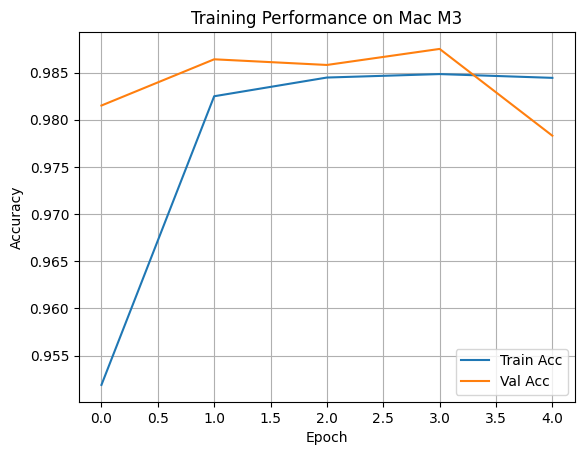

In [ ]:



# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training curves
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.title("Training Performance on Mac M3")
plt.show()

In [8]:
print("without GPU 39.49687600135803s")

without GPU 39.49687600135803s


In [9]:
print("with gpu 55.74623894691467")

with gpu 55.74623894691467


In [10]:
import tensorflow as tf

# Test device placement
with tf.device('/GPU:0'):  # or '/CPU:0'
    a = tf.constant([[1.0, 2.0]])
    b = tf.constant([[3.0], [4.0]])
    c = tf.matmul(a, b)
    print("Device used:", c.device)


Device used: /job:localhost/replica:0/task:0/device:GPU:0
